In [63]:
import pandas as pd
import pathlib
from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [64]:
work_path = pathlib.Path.cwd()
data_path = Path(work_path, 'data', 'Telco-Customer-Churn.csv')
data = pd.read_csv(data_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

### Легенда — описание переменных, которые будут использоваться в анализе

+ **Customer ID** —      ID Клиента
+ **gender** —           Пол (мужчина или женщина) 
+ **SeniorCitizen** —    Является ли клиент пожилым гражданином ( 1(Да), 0(Нет) ) 
+ **Partner** —          Есть ли у клиента партнер (Да, Нет) 
+ **Dependents** —       Есть ли у клиента иждивенцы (Да, Нет) 
+ **tenure** —           Количество месяцев, в течение которых клиент оставался в компании 
+ **PhoneService** —     Есть ли у клиента телефонная служба (Да, Нет) 
+ **MultipleLines** —    Есть ли у клиента несколько линий (Да, Нет, Нет телефонной службы) 
+ **InternetService** —  Интернет-провайдер клиента (DSL, оптоволокно, нет) 
+ **OnlineSecurity** —   Есть ли у клиента онлайн-безопасность (да, нет, нет интернет-сервиса) 
+ **OnlineBackup**  —    Есть ли у клиента онлайн-резервное копирование (да, нет, нет интернет-сервиса) 
+ **DeviceProtection** — Есть ли у клиента защита устройства (да, нет, нет интернет-сервиса) 
+ **TechSupport** —      Есть ли у клиента техническая поддержка (да, нет, нет интернет-сервиса) 
+ **StreamingTV** —      Есть ли у клиента потоковое телевидение (да, нет, нет интернет-сервиса) 
+ **StreamingMovies** —  Есть ли у клиента потоковое воспроизведение фильмов (да, нет, нет интернет-сервиса)
+ **Contract** —         Срок контракта заказчика (Месяц в месяц, Один год, Два года) 
+ **PaperlessBilling** — Есть ли у клиента безбумажный счет (Да, Нет) 
+ **PaymentMethod** — Способ оплаты клиента (электронный чек, чек по почте, банковский перевод (автоматический), кредитная карта (автоматический)
+ **MonthlyCharges** —   Сумма, списываемая с клиента ежемесячно 
+ **TotalCharges** —     Общая сумма, списанная с клиента 
+ **Churn** —            Ушел ли клиент (да, нет)

In [108]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


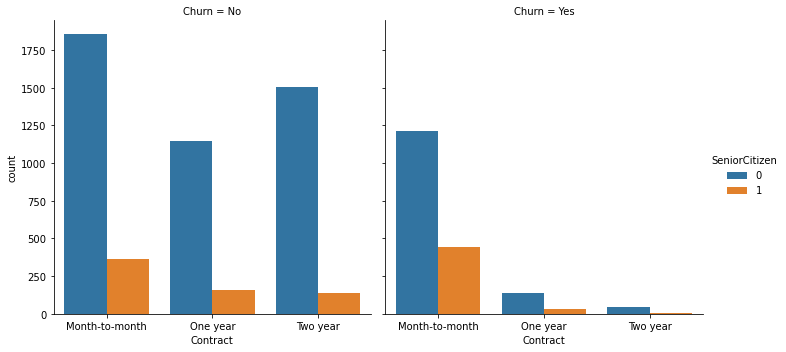

In [65]:
sns.catplot(data=data, x='Contract', hue='SeniorCitizen', col='Churn', kind='count',  height=5, aspect=1);

Срок контракта Month-to-month более склонны  уйти

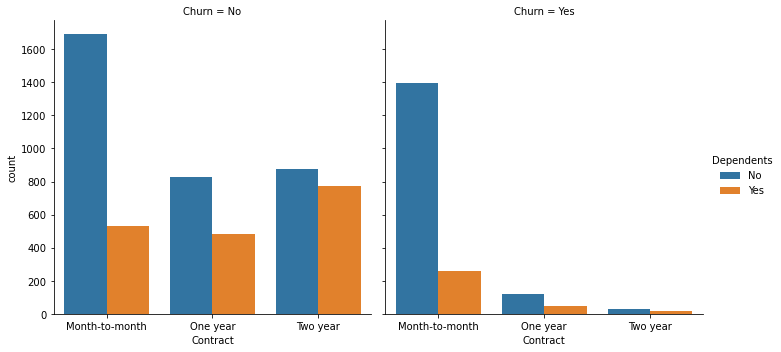

In [66]:
sns.catplot(data=data, x='Contract', hue='Dependents', col='Churn', kind='count',  height=5, aspect=1);

Иждевенцы менее склонны к уходу

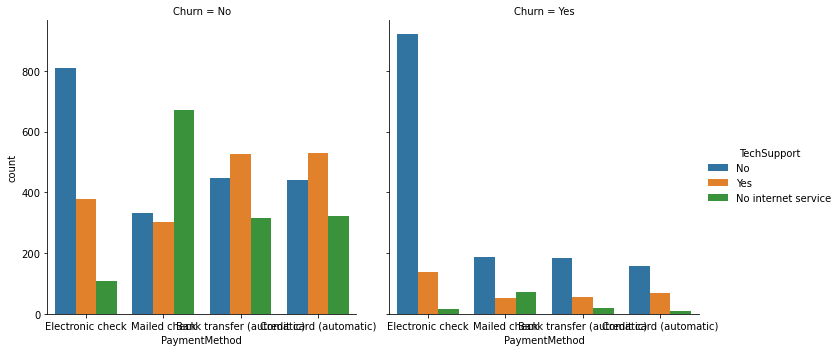

In [67]:
sns.catplot(data=data, x='PaymentMethod', hue='TechSupport', col='Churn', kind='count',  height=5, aspect=1)

У которых нету техподдержки тоже склонны уйти

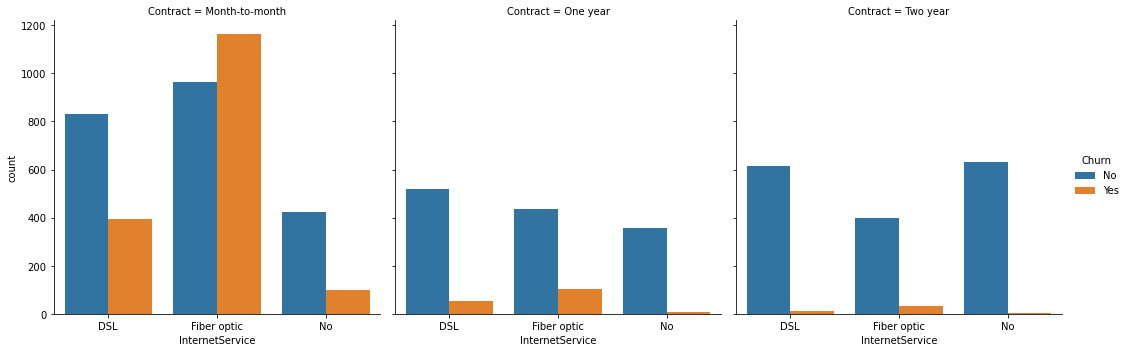

In [68]:
sns.catplot(data=data, x='InternetService', hue='Churn', col='Contract', kind='count',  height=5, aspect=1)

больше всего уходят у кого Fiber optic

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
data['Churn'] = np.where(data['Churn'] == 'Yes', 1, 0)
data['Partner'] = np.where(data['Partner'] == 'Yes', 1, 0)
data['Dependents'] = np.where(data['Dependents'] == 'Yes', 1, 0)
data['PhoneService'] = np.where(data['PhoneService'] == 'Yes', 1, 0)
data['PaperlessBilling'] = np.where(data['PaperlessBilling'] == 'Yes', 1, 0)
data['gender'] = np.where(data['gender'] == 'Male', 1, 0)

In [71]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,1.000000


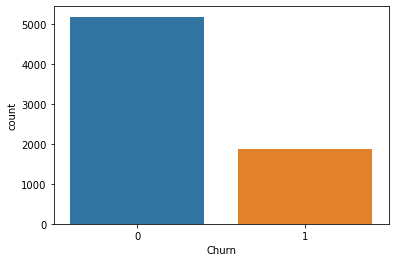

In [74]:
sns.countplot(x = 'Churn', data = data);

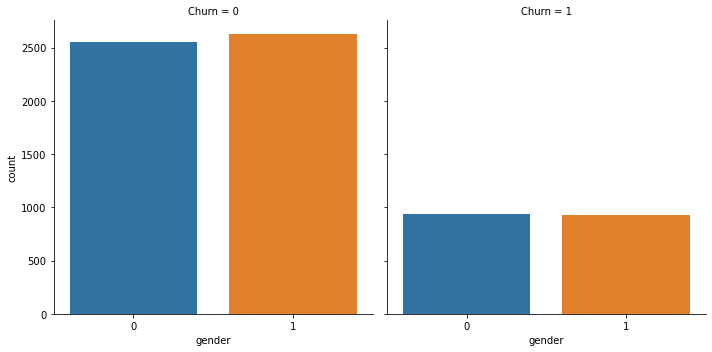

In [75]:
sns.catplot(x = 'gender', col = 'Churn', kind = 'count', data = data)

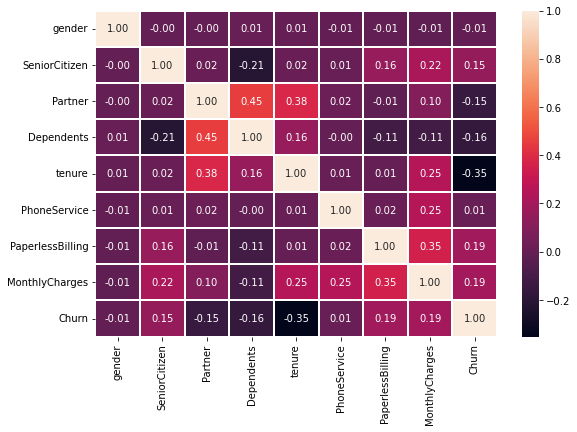

In [77]:
corr = data.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

In [79]:
two_categorical_column = []
other_categorical_column = []
for column in data.columns[1:-3].drop('tenure'):
    if len(data[column].unique()) == 2:
        two_categorical_column.append(column)
    else:
        other_categorical_column.append(column)
    print('Количество уникальных значений {0} = {1}'.format(column, data[column].unique()))

Количество уникальных значений gender = [0 1]
Количество уникальных значений SeniorCitizen = [0 1]
Количество уникальных значений Partner = [1 0]
Количество уникальных значений Dependents = [0 1]
Количество уникальных значений PhoneService = [0 1]
Количество уникальных значений MultipleLines = ['No phone service' 'No' 'Yes']
Количество уникальных значений InternetService = ['DSL' 'Fiber optic' 'No']
Количество уникальных значений OnlineSecurity = ['No' 'Yes' 'No internet service']
Количество уникальных значений OnlineBackup = ['Yes' 'No' 'No internet service']
Количество уникальных значений DeviceProtection = ['No' 'Yes' 'No internet service']
Количество уникальных значений TechSupport = ['No' 'Yes' 'No internet service']
Количество уникальных значений StreamingTV = ['No' 'Yes' 'No internet service']
Количество уникальных значений StreamingMovies = ['No' 'Yes' 'No internet service']
Количество уникальных значений Contract = ['Month-to-month' 'One year' 'Two year']
Количество уникальных

In [80]:
ohe = OneHotEncoder()
ohe_data = pd.DataFrame(ohe.fit_transform(data[other_categorical_column]).toarray(), columns=ohe.get_feature_names_out())

In [81]:
data.drop(other_categorical_column + ['customerID'], axis=1, inplace=True)
data = pd.concat([data, ohe_data], axis=1)

In [82]:
data.loc[data.TotalCharges == ' ', 'TotalCharges'] = np.nan
data.dropna(axis=0, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)
#data['TotalCharges'].fillna((data['TotalCharges'].mode()), inplace=True)

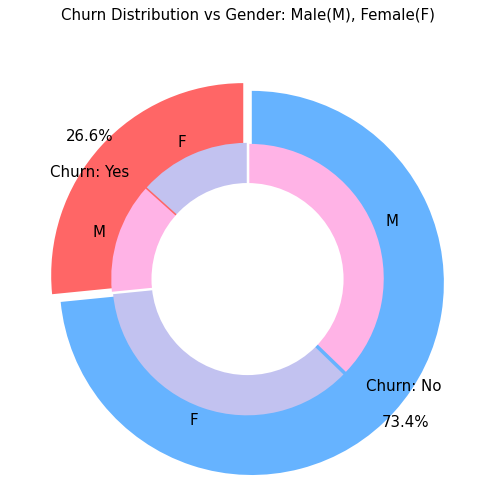

In [83]:
plt.figure(figsize=(7, 7))
labels =["Churn: Yes","Churn: No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939, 930, 2544, 2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3, 0.3) 
explode_gender = (0.1, 0.1, 0.1, 0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )

#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution vs Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

# Машинное обучение

In [84]:
# Признаки
X = data.drop('Churn', axis=1)
# Таргет
y = data['Churn']

In [85]:
# Разделение данных на обучающий и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=42)

# Случайный лес

In [86]:
# Количество деревьев
n_estimators = [int(x) for x in np.linspace(100, 1200, 10)]
# Число признаков для выбора расщепления
max_features = ['auto', 'sqrt']
# Максимальная глубина деревьев
max_depth = [int(x) for x in np.linspace(3, 20, 6)]
# Минимальное число объектов, при котором выполняется расщепление
min_samples_split = [2, 5, 10, 15, 100]
# Ограничение на число объектов в листьях
min_samples_leaf = [1, 2, 5, 10]
# Использование для построения деревьев подвыборки с возвращением
bootstrap = [True, False]
# Сетка гиперпараметров 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
               }

print(random_grid)

{'n_estimators': [100, 222, 344, 466, 588, 711, 833, 955, 1077, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 6, 9, 13, 16, 20], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [87]:
# Создание экземпляра класса RandomForestClassifier
forest = RandomForestClassifier()
# Рандомизированный поиск гиперпараметров
random_grid = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =-1)
# Обучение модели
random_grid.fit(X_train,y_train)
print(f'Лучшие параметры модели: {random_grid.best_params_}')
print(f'Лучший результат: {random_grid.best_score_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры модели: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 6, 'bootstrap': False}
Лучший результат: 0.8045152297274207


In [88]:
# Создание экземпляра модели на основе оптимизированных гиперпараметров модели
forest = RandomForestClassifier(n_estimators=1200, min_samples_split=5, 
random_state=42, min_samples_leaf=5, max_features='auto', bootstrap='False', max_depth=15)
# Обучение модели
forest.fit(X_train, y_train)
# Предсказание модели на тестовых данных
predict_forest = forest.predict(X_test)

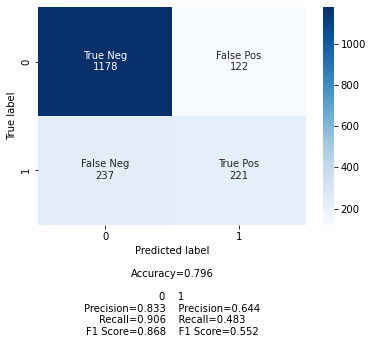

In [89]:
cf_matrix_forest = confusion_matrix(y_test, predict_forest)
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
# Функция для визуализаций матрицы ошибок 
def make_confusion_matrix(cf,
                          group_names=None,
                          count=True,
                          cbar=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
   
    # Код для создания текста внутри квадрата
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    
    
    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_labels,group_counts)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    
    # Код для генераций суммарной статистики и текса
    if sum_stats:
        #Вычисляем accuracy
        accuracy  = np.trace(cf) / float(np.sum(cf))

        # Если бинарная матрица ошибок
        if len(cf)==2:
            # Метрики для бинарной матрицы ошибок
            precision_1 = cf[1,1] / sum(cf[:,1])
            recall_1    = cf[1,1] / sum(cf[1,:])
            f1_score_1  = 2*precision_1*recall_1 / (precision_1 + recall_1)

            precision_0 = cf[0,0] / sum(cf[:,0])
            recall_0    = cf[0,0] / sum(cf[0,:])
            f1_score_0  = 2*precision_0*recall_0 / (precision_0 + recall_0)

            stats_text = "\n\nAccuracy={:0.3f}\n\n0    1\nPrecision={:0.3f}    Precision={:0.3f}\nRecall={:0.3f}    Recall={:0.3f}\nF1 Score={:0.3f}    F1 Score={:0.3f}".format(
                accuracy,precision_0, precision_1,recall_0, recall_1,f1_score_0, f1_score_1)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # Параметры рисунка
    if figsize==None:
        # Значение по умолчанию
        figsize = plt.rcParams.get('figure.figsize')

    

    # Визуализация матрицы ошибок
    plt.figure(figsize=figsize)
    sns.heatmap(cf, annot=box_labels, fmt="", cmap=cmap, cbar=cbar)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

make_confusion_matrix(cf_matrix_forest, group_names)


In [98]:
importance

,features,feature_importances_
5,PhoneService,0.003197
10,MultipleLines_No phone service,0.003199
14,InternetService_No,0.003886
16,OnlineSecurity_No internet service,0.004230
19,OnlineBackup_No internet service,0.004666
28,StreamingTV_No internet service,0.004846
25,TechSupport_No internet service,0.004867
31,StreamingMovies_No internet service,0.004911
22,DeviceProtection_No internet service,0.005300
39,PaymentMethod_Mailed check,0.006142


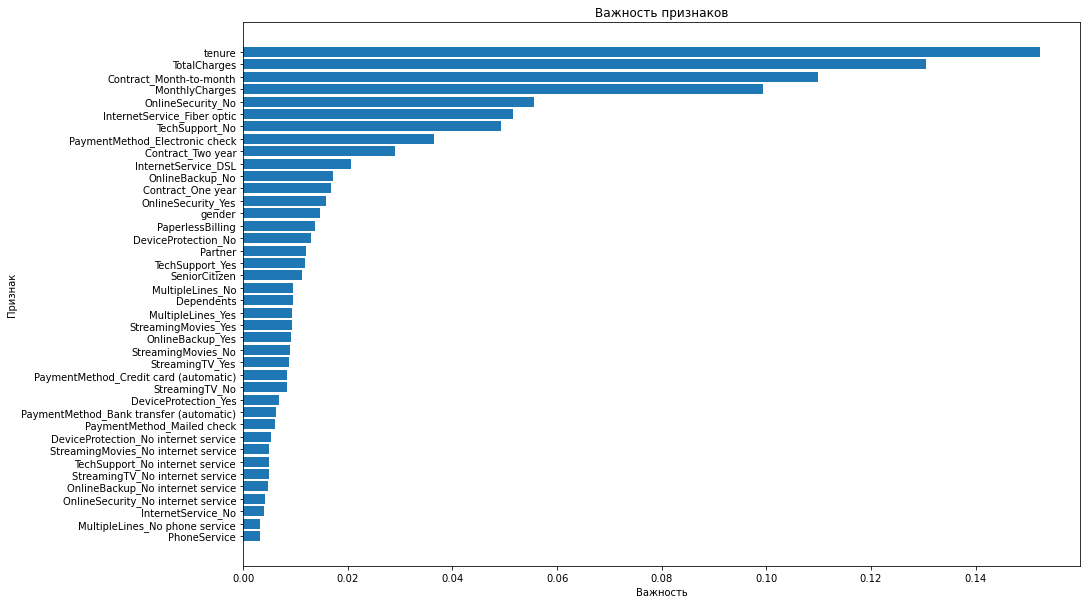

In [99]:
# Создаем датафрейм на основе важности признаков
importance = pd.DataFrame({'features': X.columns, 'feature_importances_':forest.feature_importances_,})
# Сортируем по возрастанию
importance = importance.sort_values(by='feature_importances_')

# Количество признаков
n_features = X_train.shape[1]

# Визуализируем график важности признаков
plt.figure(figsize=(15, 10))
plt.barh(np.arange(n_features), importance.feature_importances_)
plt.yticks(np.arange(n_features), importance.features)
plt.ylabel("Признак")
plt.xlabel('Важность')
plt.title('Важность признаков')
plt.show()

# KNN

In [91]:
# Ошибка предказания
error_rate=list()
# Вычисляем оптимальное число соседей
for i in range(1, 40):
    # Создаем экземпляр класса
    knn=KNeighborsClassifier(n_neighbors=i)
    # Обучаем модель на тренировочных данных
    knn.fit(X_train,y_train)
    # Предсказание на тестовых данных
    prediction_i=knn.predict(X_test)
    error_rate.append(np.sum(prediction_i != y_test))

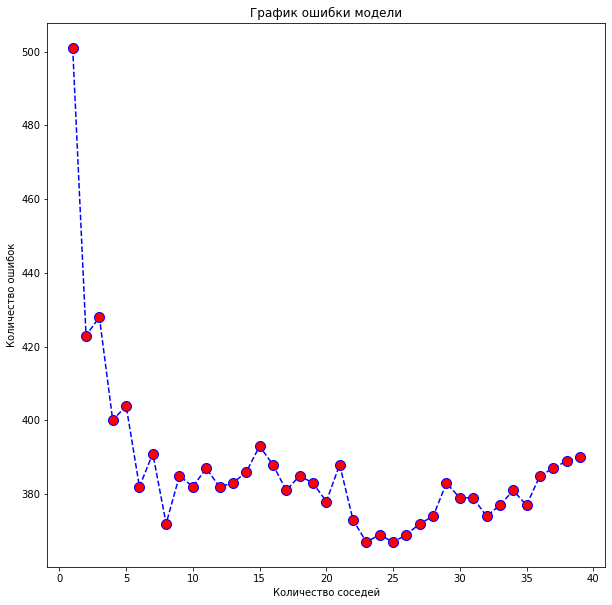

In [92]:
plt.figure(figsize=(10, 10))
plt.plot(range(1, 40), error_rate, color="blue", linestyle="--", marker="o", markerfacecolor="red", markersize=10)
plt.title("График ошибки модели")
plt.xlabel("Количество соседей")
plt.ylabel("Количество ошибок");

In [93]:
# Обучаем модель на n_neighbors=23
knn=KNeighborsClassifier(n_neighbors=23)
# Обучаем модель
knn.fit(X_train, y_train)
# Предсказание модели
predict_knn=knn.predict(X_test)

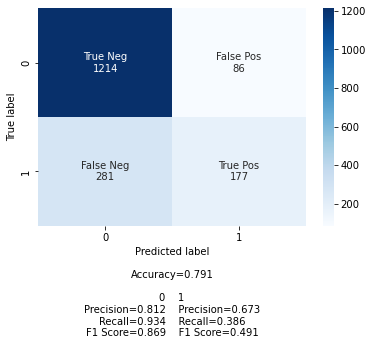

In [94]:
# Матрица ошибок
cf_knn = confusion_matrix(y_test, predict_knn)
make_confusion_matrix(cf_knn, group_names)

# Дерево решений

In [95]:
# Сетка параметров
param_tree = {'max_depth': list(np.arange(1, 15, 1)), 
              'criterion': ['gini', 'entropy']}
# Cоздаем экземпляр класса GridSearchCV       
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_tree, n_jobs =-1, cv=5)
# Обучаем модель
grid_tree.fit(X.values,y.values)
# предсказание модели
predict_tree = grid_tree.predict(X_test)
print(f'Оптимальные гиперпараметры модели - {grid_tree.best_params_}')

Оптимальные гиперпараметры модели - {'criterion': 'gini', 'max_depth': 5}


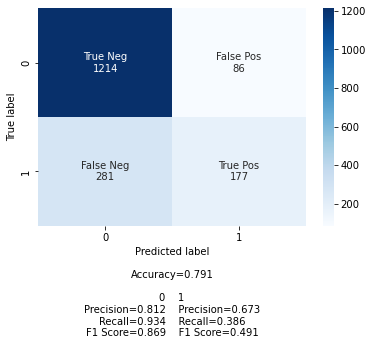

In [96]:
# Матрица ошибок
cf_tree = confusion_matrix(y_test, predict_knn)
make_confusion_matrix(cf_tree, group_names)

# Метод опорных векторов

In [97]:
# Сетка параметров
param_grid = {"C":[1, 5, 10],
            "gamma":[1, 0.01, 0.001]} 

grid_svc = GridSearchCV(SVC(), param_grid, cv=5)
grid_svc.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
print(grid_svc.best_params_)
print(grid_svc.best_estimator_)

{'C': 1, 'gamma': 0.001}
SVC(C=1, gamma=0.001)


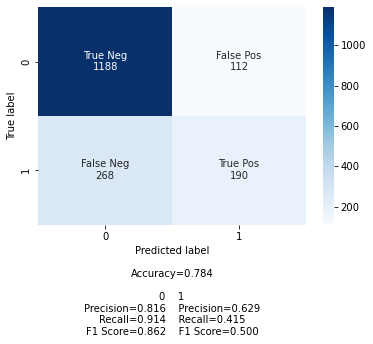

In [ ]:
predict_svc = grid_svc.predict(X_test)
cf_svc = confusion_matrix(y_test, predict_svc)
make_confusion_matrix(cf_svc, group_names)

# Логистическая регрессия

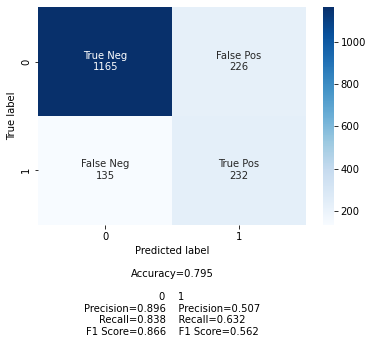

In [ ]:
Lr = LogisticRegression()
Lr.fit(X_train, y_train)
predict = Lr.predict(X_test)
cf_lr = confusion_matrix(predict, y_test)
make_confusion_matrix(cf_lr, group_names)
